In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.integrate

In [4]:
a, b = 0, 1
f = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

## 被積分関数をプロット

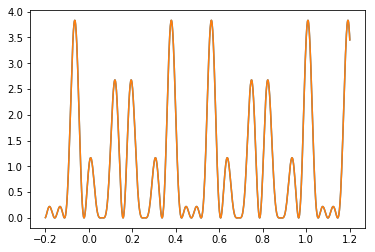

In [6]:
x = np.linspace(-0.2, 1.2, 1000)
y = f(x)
plt.plot(x, y)
plt.show()

## scipy.integrateで積分を計算

In [7]:
I = scipy.integrate.quad(f, a, b)[0]
print("scipy.integrate:", I)

scipy.integrate: 0.9652009360501453


## モンテカルロ積分

In [9]:
N = 100000
x = uniform(loc=a, scale=b-a).rvs(size=N)
I = (b-a) * np.mean(f(x))
print("モンテカルロ積分:", I)

モンテカルロ積分: 0.96637464727


## コーシー・ベイズ推定量をモンテカルロ積分で計算する

In [12]:
from scipy.stats import cauchy, norm

In [13]:
x = 4

## 分子の被積分関数

In [14]:
func1 = lambda t: t * norm(loc=x).pdf(t) * cauchy.pdf(t)

## 分母の被積分関数

In [15]:
func2 = lambda t: norm(loc=x).pdf(t) * cauchy.pdf(t)

## scipy.integrateで積分計算

In [18]:
import math
inf = math.inf
I_nume = scipy.integrate.quad(func1, -inf, inf)[0]
I_denom = scipy.integrate.quad(func2, -inf, inf)[0]
I = I_nume/ I_denom
print("scipy.integrate:",I)

scipy.integrate: 3.435061555229311


## モンテカルロ積分(1)
- pをコーシー分布、fを正規分布とした場合
- コーシー分布からサンプリングする

In [19]:
x = 4
N = 100000

## 分子の積分をモンテカルロ法で計算

In [22]:
T = cauchy.rvs(size=N)
I_nume = np.mean(T * norm(loc=x).pdf(T))

## 分母の積分をモンテカルロ法で計算

In [23]:
T = cauchy.rvs(size=N)
I_denom = np.mean(norm(loc=x).pdf(T))
I = I_nume / I_denom

In [24]:
print("モンテカルロ積分(1):", I)

モンテカルロ積分(1): 3.47512483362


## モンテカルロ積分(2)
- pを正規分布、fをコーシー分布とした場合
- 正規分布からサンプリングする

## 分子

In [25]:
T = norm(loc=x).rvs(size=N)
I_nume = np.mean(T * cauchy.pdf(T))

## 分母

In [26]:
T = norm(loc=x).rvs(size=N)
I_denom = np.mean(cauchy.pdf(T))

In [27]:
I = I_nume / I_denom
print("モンテカルロ積分(2):",I)

モンテカルロ積分(2): 3.43291126793
